In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [105]:
df = pd.read_csv('../data/interim/covid_base.csv')
df.LastUpdate = df.LastUpdate.map(pd.Timestamp)
df

,Province,Country,LastUpdate,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN
1,Beijing,Mainland China,2020-01-22 17:00:00,14.0,NaN,NaN
2,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,NaN,NaN
3,Fujian,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN
4,Gansu,Mainland China,2020-01-22 17:00:00,NaN,NaN,NaN
...,...,...,...,...,...,...
28131,NaN,Thailand,2020-01-24 17:00:00,5.0,NaN,NaN
28132,NaN,South Korea,2020-01-24 17:00:00,2.0,NaN,NaN
28133,NaN,Singapore,2020-01-24 17:00:00,3.0,NaN,NaN
28134,NaN,Vietnam,2020-01-24 17:00:00,2.0,NaN,NaN


In [106]:
by_country = { country: x.set_index('LastUpdate').sort_index() for country, x in df.groupby('Country')}

In [107]:
def euclidean(p1, p2):
    return np.sqrt(
        np.square(p2['log_Total'] - p1['log_Total']) + np.square(p1['log_New'] - p1['log_New'])
    )

In [108]:
def compute_infectance(_df):
    infectancia = [0]
    for i in range(1, len(_df)):
        p1, p2 = _df.iloc[i - 1], _df.iloc[i]

        distance = euclidean(p1, p2)
        infectancia.append(distance)

    _df['Infect'] = infectancia
    return _df

In [126]:
infect = {}

In [145]:
for country, _df in by_country.items():
    New = _df.Confirmed.resample("1D").sum()
    Total = New.cumsum()

    log_New = np.log(New)
    log_Total = np.log(Total)
    
    df_ = pd.concat([New, Total, log_New, log_Total], axis=1)
    df_.columns = ['New', 'Total', 'log_New', 'log_Total']
    infect[country] = compute_infectance(df_)
    

/home/vittorfp/tcc/solar-usine-analysis/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


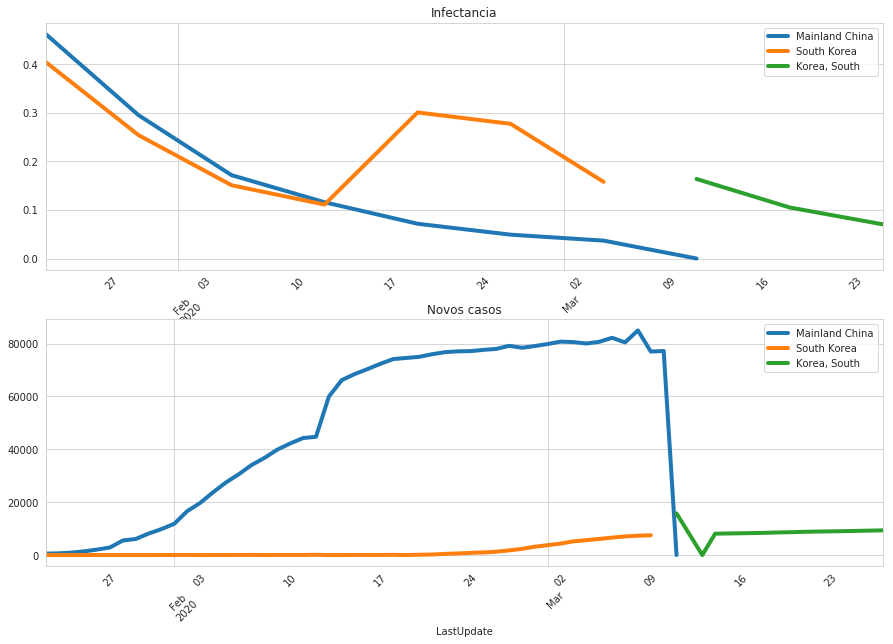

In [187]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
contries = ['Mainland China', 'South Korea', 'Korea, South']#, 'Brazil', 'Italy', 'US']
for c in contries:
    infect[c].Infect.resample('7D').mean().plot(rot=45, ax=ax[0],lw=4)
    infect[c].New.plot(rot=45, ax=ax[1], lw=4);

ax[0].legend(contries)
ax[1].legend(contries)

ax[0].set_title('Infectancia')
ax[1].set_title('Novos casos');


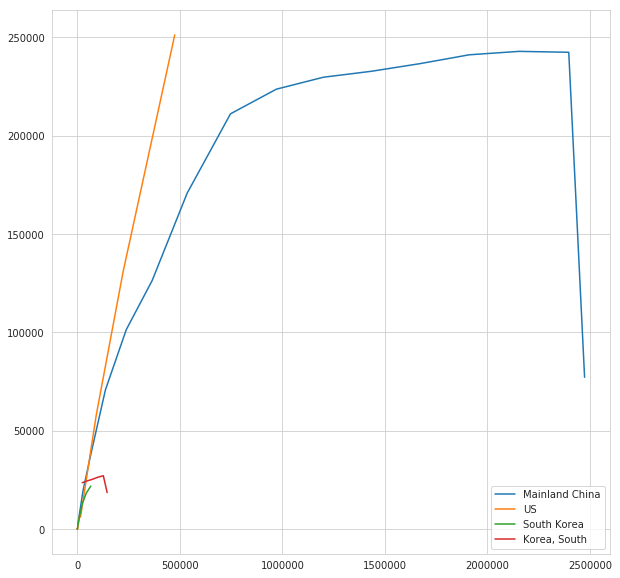

In [199]:
countries = ['Mainland China', 'US', 'South Korea','Korea, South']#, 'Brazil', 'Italy', 'US']
_, ax = plt.subplots(1, 1, figsize=(10, 10))
for c in countries:
    ax.plot(infect[c].Total.resample('3D').last(), infect[c].New.resample('3D').sum())
ax.legend(countries);

In [148]:
list(by_country.keys())

[' Azerbaijan',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cruise Ship',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 '